# Portfolio Strategy Comparison

This notebook compares the cumulative returns of different portfolio strategies:
- **Equally Weighted (EW)**: Equal allocation to all stocks
- **Minimum Variance Optimization (MVO)**: Markowitz optimization minimizing portfolio variance
- **Dynamic Markowitz**: Dynamic portfolio optimization with monthly rebalancing
- **Cross-Sectional Momentum**: Long winners, short losers momentum strategy

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Load all cumulative returns CSV files
ew_df = pd.read_csv('results/ew_cumulative_returns.csv', parse_dates=['Date'])
mvo_df = pd.read_csv('results/mvo_cumulative_returns.csv', parse_dates=['Date'])
dynamic_df = pd.read_csv('results/dynamic_markowitz_cumulative_returns.csv', parse_dates=['Date'])
cs_df = pd.read_csv('results/cross_sectional_cumulative_returns.csv', parse_dates=['Date'])

print("Data loaded successfully!")
print(f"EW: {len(ew_df)} days, from {ew_df['Date'].min()} to {ew_df['Date'].max()}")
print(f"MVO: {len(mvo_df)} days, from {mvo_df['Date'].min()} to {mvo_df['Date'].max()}")
print(f"Dynamic: {len(dynamic_df)} days, from {dynamic_df['Date'].min()} to {dynamic_df['Date'].max()}")
print(f"CS: {len(cs_df)} days, from {cs_df['Date'].min()} to {cs_df['Date'].max()}")

Data loaded successfully!
EW: 3022 days, from 2014-01-02 00:00:00 to 2025-08-01 00:00:00
MVO: 3022 days, from 2014-01-02 00:00:00 to 2025-08-01 00:00:00
Dynamic: 2894 days, from 2014-07-01 00:00:00 to 2025-08-01 00:00:00
CS: 2880 days, from 2014-07-10 00:00:00 to 2025-07-23 00:00:00


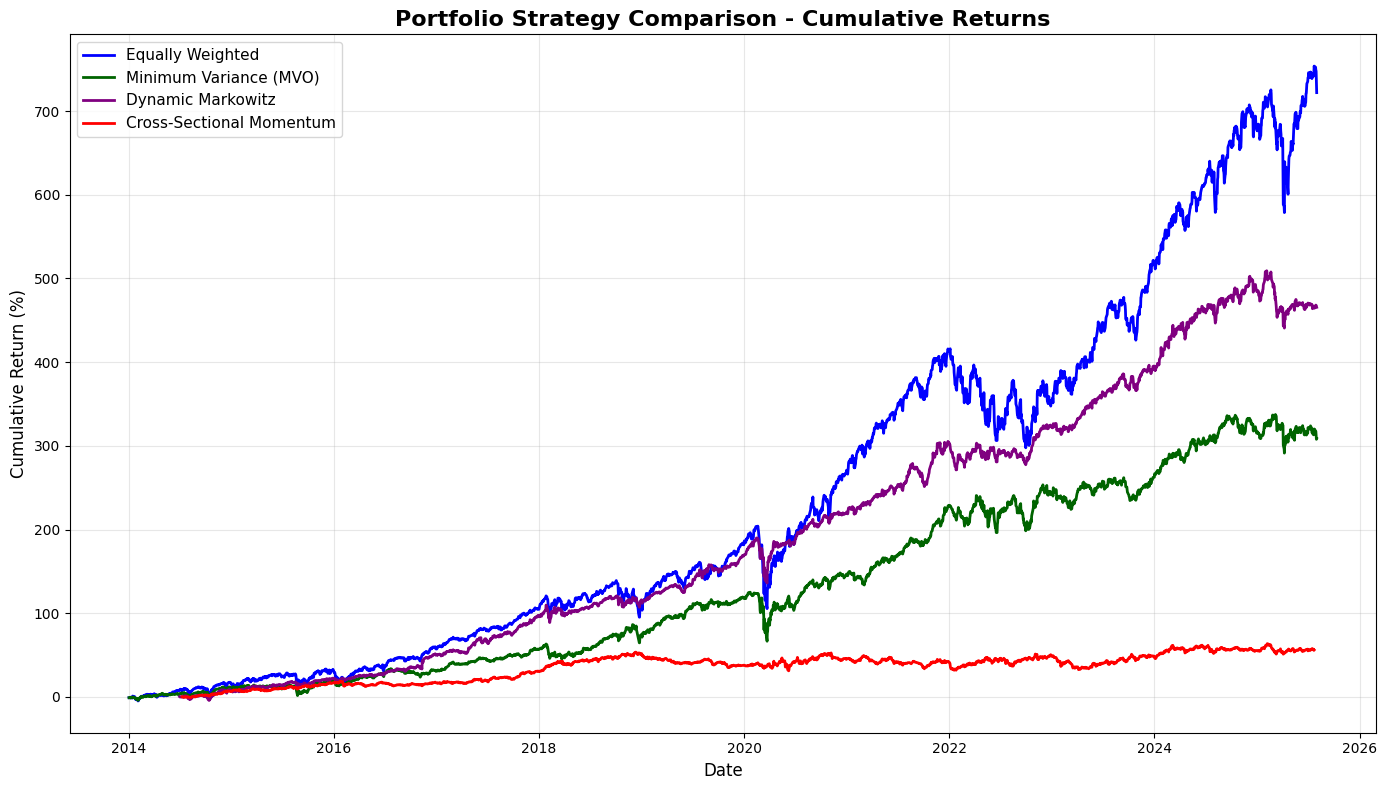

In [18]:
# Plot all cumulative returns together
plt.figure(figsize=(14, 8))

plt.plot(ew_df['Date'], ew_df['Cumulative Return'] * 100, 
         label='Equally Weighted', color='blue', linewidth=2)
plt.plot(mvo_df['Date'], mvo_df['Cumulative Return'] * 100, 
         label='Minimum Variance (MVO)', color='darkgreen', linewidth=2)
plt.plot(dynamic_df['Date'], dynamic_df['Cumulative Return'] * 100, 
         label='Dynamic Markowitz', color='purple', linewidth=2)
plt.plot(cs_df['Date'], cs_df['Cumulative Return'] * 100, 
         label='Cross-Sectional Momentum', color='red', linewidth=2)

plt.title('Portfolio Strategy Comparison - Cumulative Returns', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# Calculate final returns for each strategy
strategies = {
    'Equally Weighted': ew_df['Cumulative Return'].iloc[-1],
    'Minimum Variance (MVO)': mvo_df['Cumulative Return'].iloc[-1],
    'Dynamic Markowitz': dynamic_df['Cumulative Return'].iloc[-1],
    'Cross-Sectional Momentum': cs_df['Cumulative Return'].iloc[-1]
}

# Create comparison table
comparison_df = pd.DataFrame.from_dict(strategies, orient='index', columns=['Final Cumulative Return'])
comparison_df['Final Cumulative Return (%)'] = comparison_df['Final Cumulative Return'] * 100
comparison_df = comparison_df.sort_values('Final Cumulative Return', ascending=False)

print("=" * 60)
print("FINAL CUMULATIVE RETURNS COMPARISON")
print("=" * 60)
print(comparison_df[['Final Cumulative Return (%)']].to_string())
print("=" * 60)

FINAL CUMULATIVE RETURNS COMPARISON
                          Final Cumulative Return (%)
Equally Weighted                           722.087916
Dynamic Markowitz                          465.583933
Minimum Variance (MVO)                     308.741157
Cross-Sectional Momentum                    56.012016


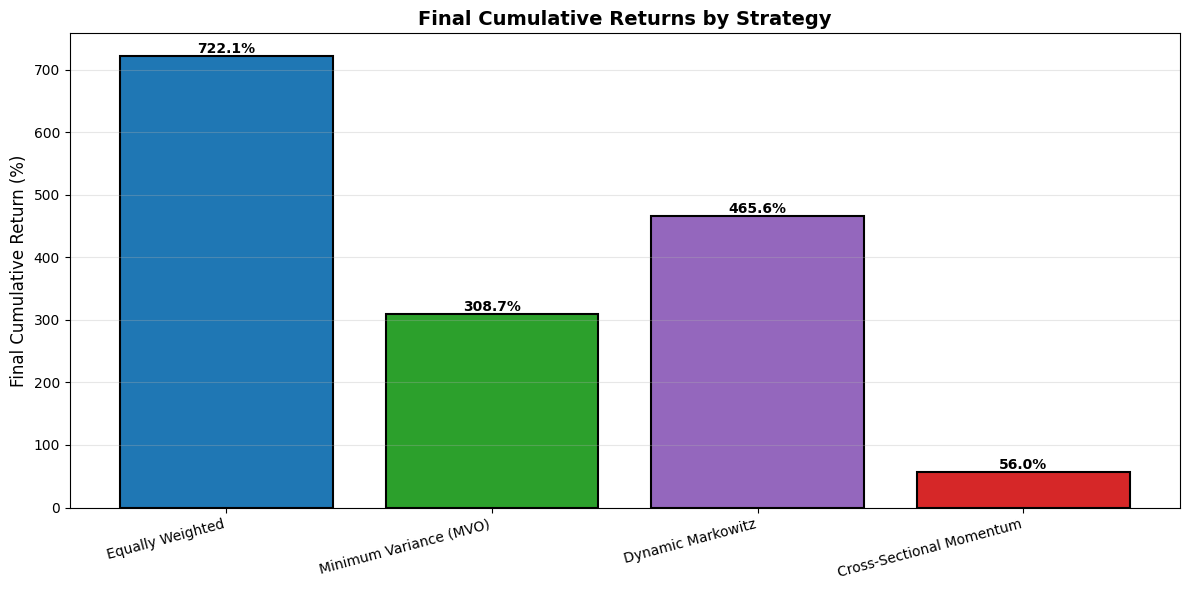

In [20]:
# Bar chart of final returns
plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#2ca02c', '#9467bd', '#d62728']
bars = plt.bar(range(len(strategies)), 
               [v * 100 for v in strategies.values()], 
               color=colors, 
               edgecolor='black', 
               linewidth=1.5)

plt.xticks(range(len(strategies)), strategies.keys(), rotation=15, ha='right')
plt.ylabel('Final Cumulative Return (%)', fontsize=12)
plt.title('Final Cumulative Returns by Strategy', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## Instructions

**Before running this notebook**, make sure you have run all the other portfolio strategy notebooks to generate the CSV files:

1. `ew copy.ipynb` - Run all cells to generate `results/ew_cumulative_returns.csv`
2. `mvo copy.ipynb` - Run all cells to generate `results/mvo_cumulative_returns.csv`
3. `dynamic_markowitz.ipynb` - Run all cells to generate `results/dynamic_markowitz_cumulative_returns.csv`
4. `Cross.ipynb` - Run all cells to generate `results/cross_sectional_cumulative_returns.csv`

Once all CSV files are generated, you can run this notebook to compare the strategies.